<a href="https://colab.research.google.com/github/RuFerdZ/Starbucks-Data-Analysis/blob/main/Starbucks_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Student Name: Galgamuge Emmanuel Fernando
# Student ID: c0918066

# References
# https://www.kaggle.com/code/c0011006cyc/customers-behaviour-eda-i-with-plotly/notebook#Which-part-of-starbucks-satisfies-customers-the-most/least?

# https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey/code

# https://www.kaggle.com/code/judytan01/starbucks-customers-profile-behavior

# https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

In [ ]:
df_raw = pd.read_csv('Starbucks satisfactory survey.csv')
df_raw.head()

In [ ]:
#rename column
df_new = df_raw.rename(columns={"1. Your Gender": 'Gender',
                                "2. Your Age": "ageGroup",
                                "3. Are you currently....?":"status",
                                "4. What is your annual income?":"annualIncome",
                                "5. How often do you visit Starbucks?":"visitFrequency",
                                "6. How do you usually enjoy Starbucks?":"Method",
                                "7. How much time do you normally  spend during your visit?":"timeCost",
                                "8. The nearest Starbucks's outlet to you is...?":"location",
                                "9. Do you have Starbucks membership card?":"membership",
                                "10. What do you most frequently purchase at Starbucks?":"mostPurchase",
                                "11. On average, how much would you spend at Starbucks per visit?":"moneySpend",
                                 }, inplace=False)

<a id="aaa"></a>
# Components of the customers

In [ ]:
fig = px.scatter_3d(df_new,x='ageGroup', y='status', z='annualIncome',color='status',symbol='Gender')
fig.show()

<a id="bbb"></a>
# Visiting Frequency

### Histogram

In [ ]:
fig = px.histogram(df_new, x="visitFrequency")
fig.update_layout(barmode='stack')
fig.show()

### Pie Chart

In [ ]:
# Construct a DataFrame by 'visitingFrequency' and its value_counts()
dfF = df_new['visitFrequency'].value_counts()
dfF = pd.DataFrame({'Frequency':dfF.index, 'Counts':dfF.values})

labels = dfF['Frequency']
values = dfF['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In this survey 62.3% of the customers rarely come to Starbucks.

<a id="ccc"></a>
# How do people buy starbucks?

### Histogram

In [ ]:
fig = px.histogram(df_new, x="Method")
fig.update_layout(barmode='stack')
fig.show()

## Pie Chart

In [ ]:
# same process as Pie chart of visting frequency
dfM = df_new['Method'].value_counts()
dfM = pd.DataFrame({'Method':dfM.index, 'Counts':dfM.values})

labels = dfM['Method']
values = dfM['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

<a id="ddd"></a>
# Time spending in Starbucks of each Customer

In [ ]:
dfT = df_new['timeCost'].value_counts()
dfT = pd.DataFrame({'Time':dfT.index, 'Counts':dfT.values})

labels = dfT['Time']
values = dfT['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

<a id="eee"></a>
# Location

Distance of the nearest Starbuck of the customers

In [ ]:
dfL = df_new['location'].value_counts()
dfL = pd.DataFrame({'Distance':dfL.index, 'Counts':dfL.values})

labels = dfL['Distance']
values = dfL['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

<a id="fff"></a>
# Membership Card

How many customers (don't )have menbership card?

In [ ]:
dfMem = df_new['membership'].value_counts()
dfMem = pd.DataFrame({'Membership(Y/N)':dfMem.index, 'Counts':dfMem.values})

labels = dfMem['Membership(Y/N)']
values = dfMem['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

<a id="ggg"></a>
# Product sales analysis

In [ ]:
dfP = df_new['mostPurchase'].value_counts()
dfP = pd.DataFrame({'Product':dfP.index, 'Counts':dfP.values})

labels = dfP['Product']
values = dfP['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

<a id="hhh"></a>
# Money spend

How much money did people pay to Starbucks during this visit?

In [ ]:
dfS = df_new['moneySpend'].value_counts()
dfS = pd.DataFrame({'Costs':dfS.index, 'Counts':dfS.values})

labels = dfS['Costs']
values = dfS['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

<a id="iii"></a>
# Components of customers & money spend

In [ ]:
fig = px.scatter_3d(df_new,x='ageGroup', y='status', z='annualIncome',color='moneySpend',symbol='Gender')
fig.show()

<a id="jjj"></a>
# Which part of starbucks satisfies customers the most/least?

* Comparing with other coffee shop : How would you rate the quality of Starbucks compared to other brands?
* Price : How would you rate the price range at Starbucks?
* Ambient : How would you rate the ambiance at Starbucks? (lighting, music, etc...)
* Wifi : You rate the WiFi quality at Starbucks as..
* Service : How would you rate the service at Starbucks? (Promptness, friendliness, etc..)
* MhRating : How likely you will choose Starbucks for doing business meetings or hangout with friends?

In [ ]:
df_new = df_new.rename(columns =
                       {"12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:":"ComparingRate",
                        "13. How would you rate the price range at Starbucks?":"PriceRate",
                        "14. How important are sales and promotions in your purchase decision?":"s&pCareness",
                        "15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)":"AmbientRate",
                        "16. You rate the WiFi quality at Starbucks as..":"WifiRate",
                        "17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)":"ServiceRate",
                        "18. How likely you will choose Starbucks for doing business meetings or hangout with friends?":"MhRating"
                        })
df_new.head()

,Timestamp,Gender,ageGroup,status,annualIncome,visitFrequency,Method,timeCost,location,membership,...,moneySpend,ComparingRate,PriceRate,s&pCareness,AmbientRate,WifiRate,ServiceRate,MhRating,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
# Caculate the sum of each column and store it into a DataFrame

# dict Score
Score = {}
Score['Comparing with other coffee shop']=df_new['ComparingRate'].sum()
Score['Price']=df_new['PriceRate'].sum()
Score['Ambient'] = df_new['AmbientRate'].sum()
Score['Wifi'] = df_new['WifiRate'].sum()
Score['Service'] = df_new['ServiceRate'].sum()
Score['MhRating'] = df_new['MhRating'].sum()

# Convert Score into DataFrame
score_df = pd.DataFrame(Score.items(), columns=['part','score'])
score_df

,part,score
0,Comparing with other coffee shop,447
1,Price,353
2,Ambient,458
3,Wifi,397
4,Service,457
5,MhRating,429


In [ ]:
fig = px.bar(score_df, x='part', y='score')
fig.show()

### *Which part satisfies customers the most?*

In [ ]:
score_df[score_df['score']==score_df['score'].max()]

,part,score
2,Ambient,458


###  *Which part satisfies customers the least?*

In [ ]:
score_df[score_df['score']==score_df['score'].min()]

,part,score
1,Price,353


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

In [ ]:
# check unique values in dataset
df_raw.apply(lambda x: len(x.unique()))

Timestamp                                                                                                                 122
1. Your Gender                                                                                                              2
2. Your Age                                                                                                                 4
3. Are you currently....?                                                                                                   4
4. What is your annual income?                                                                                              5
5. How often do you visit Starbucks?                                                                                        5
6. How do you usually enjoy Starbucks?                                                                                      9
7. How much time do you normally  spend during your visit?                                                            

In [ ]:
# check for null values
df_raw.isnull().sum()

Timestamp                                                                                                                 0
1. Your Gender                                                                                                            0
2. Your Age                                                                                                               0
3. Are you currently....?                                                                                                 0
4. What is your annual income?                                                                                            0
5. How often do you visit Starbucks?                                                                                      0
6. How do you usually enjoy Starbucks?                                                                                    1
7. How much time do you normally  spend during your visit?                                                                0
8. The n

In [ ]:
df_raw.columns = ['date', 'gender', 'age_range', 'occupation', 'annual_income', 'visit_frequency', 'consume_method', 'time_spent',
              'nearest_outlet', 'member_card', 'item_purchase', 'avg_amt_spent', 'product_quality_rate', 'price_range_rate',
              'promotions_importance_rate', 'ambiance_rate', 'wifi_quality_rate','service_rate', 'meeting_hangout_place_rate',
              'received_promotions_method', 'continue_buying']

In [ ]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        122 non-null    object
 1   gender                      122 non-null    object
 2   age_range                   122 non-null    object
 3   occupation                  122 non-null    object
 4   annual_income               122 non-null    object
 5   visit_frequency             122 non-null    object
 6   consume_method              121 non-null    object
 7   time_spent                  122 non-null    object
 8   nearest_outlet              122 non-null    object
 9   member_card                 122 non-null    object
 10  item_purchase               122 non-null    object
 11  avg_amt_spent               122 non-null    object
 12  product_quality_rate        122 non-null    int64 
 13  price_range_rate            122 non-null    int64 

In [ ]:
# check unique values in dataset
df_raw.apply(lambda x: len(x.unique()))

date                          122
gender                          2
age_range                       4
occupation                      4
annual_income                   5
visit_frequency                 5
consume_method                  9
time_spent                      5
nearest_outlet                  3
member_card                     2
item_purchase                  20
avg_amt_spent                   4
product_quality_rate            5
price_range_rate                5
promotions_importance_rate      5
ambiance_rate                   5
wifi_quality_rate               5
service_rate                    5
meeting_hangout_place_rate      5
received_promotions_method     32
continue_buying                 2
dtype: int64

In [ ]:
# check for null values
df_raw.isnull().sum()

date                          0
gender                        0
age_range                     0
occupation                    0
annual_income                 0
visit_frequency               0
consume_method                1
time_spent                    0
nearest_outlet                0
member_card                   0
item_purchase                 0
avg_amt_spent                 0
product_quality_rate          0
price_range_rate              0
promotions_importance_rate    0
ambiance_rate                 0
wifi_quality_rate             0
service_rate                  0
meeting_hangout_place_rate    0
received_promotions_method    1
continue_buying               0
dtype: int64

In [ ]:
# remove null rows in column 'consume_method'
df_raw = df_raw.dropna(subset=['consume_method'])
df_raw.isnull().sum()

date                          0
gender                        0
age_range                     0
occupation                    0
annual_income                 0
visit_frequency               0
consume_method                0
time_spent                    0
nearest_outlet                0
member_card                   0
item_purchase                 0
avg_amt_spent                 0
product_quality_rate          0
price_range_rate              0
promotions_importance_rate    0
ambiance_rate                 0
wifi_quality_rate             0
service_rate                  0
meeting_hangout_place_rate    0
received_promotions_method    0
continue_buying               0
dtype: int64

In [ ]:
#Returning Customers' Profiles
df_yes = df_raw[df_raw['continue_buying']=='Yes']
df_profile = df_yes[['gender', 'age_range', 'occupation', 'annual_income']]
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 120
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         94 non-null     object
 1   age_range      94 non-null     object
 2   occupation     94 non-null     object
 3   annual_income  94 non-null     object
dtypes: object(4)
memory usage: 3.7+ KB


ValueError: ignored

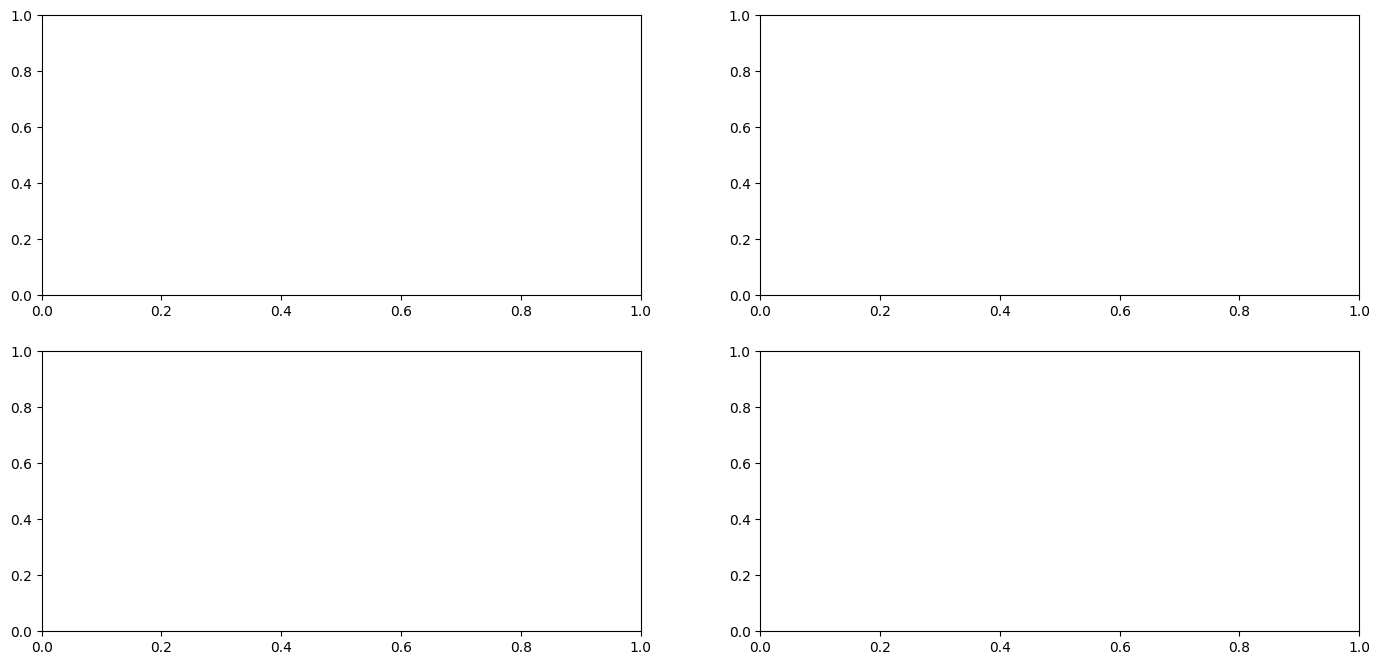

In [ ]:
# Count Plots for Returning Customers' Profiles
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(17, 8))
index = 0
ax = ax.flatten()

for col in df_profile.columns:
    sns.countplot(df_profile[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=5)

In [ ]:
#Returning Customers' Buying Behavior Analysis
df_behavior = df_yes[['visit_frequency', 'consume_method', 'time_spent', 'nearest_outlet', 'member_card', 'item_purchase', 'avg_amt_spent', 'received_promotions_method']]
df_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   visit_frequency             94 non-null     object
 1   consume_method              94 non-null     object
 2   time_spent                  94 non-null     object
 3   nearest_outlet              94 non-null     object
 4   member_card                 94 non-null     object
 5   item_purchase               94 non-null     object
 6   avg_amt_spent               94 non-null     object
 7   received_promotions_method  94 non-null     object
dtypes: object(8)
memory usage: 8.7+ KB


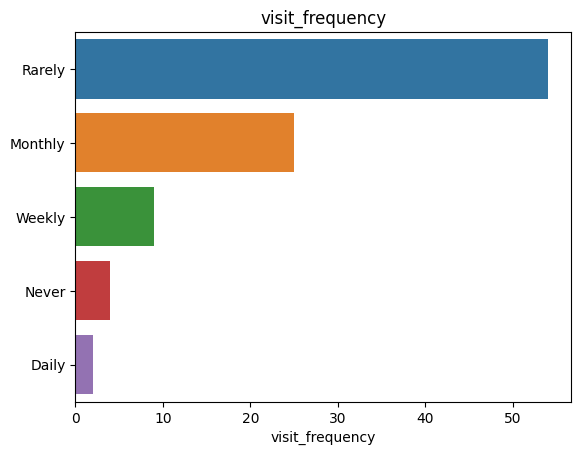

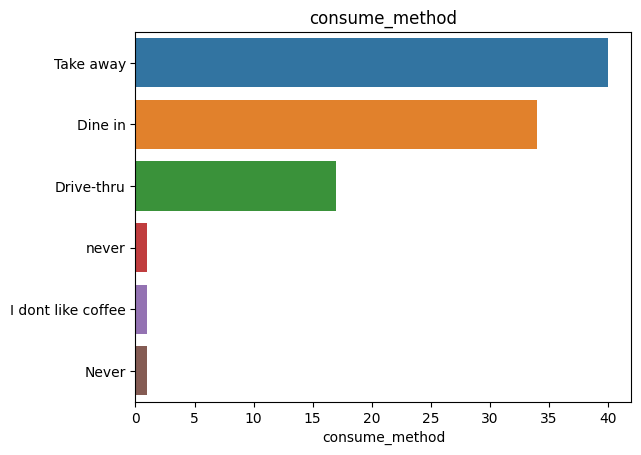

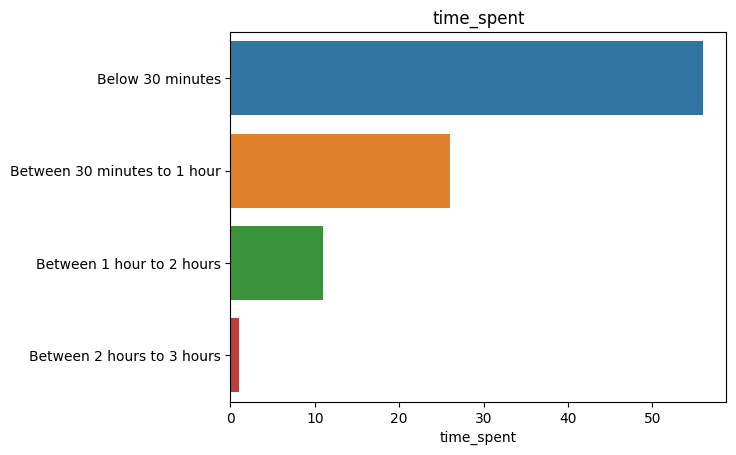

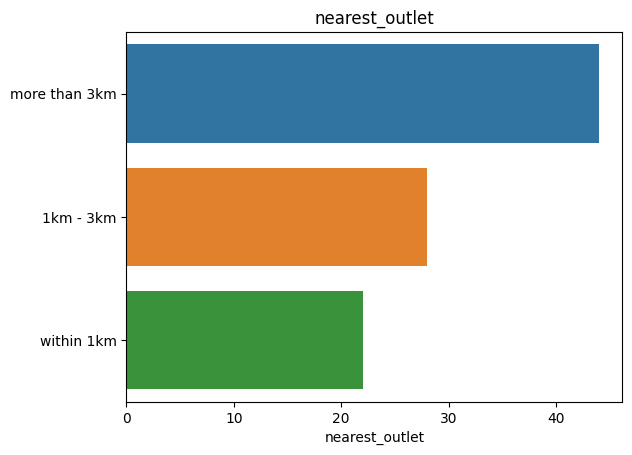

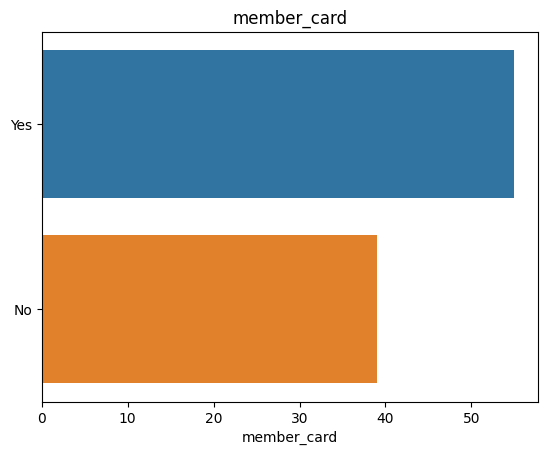

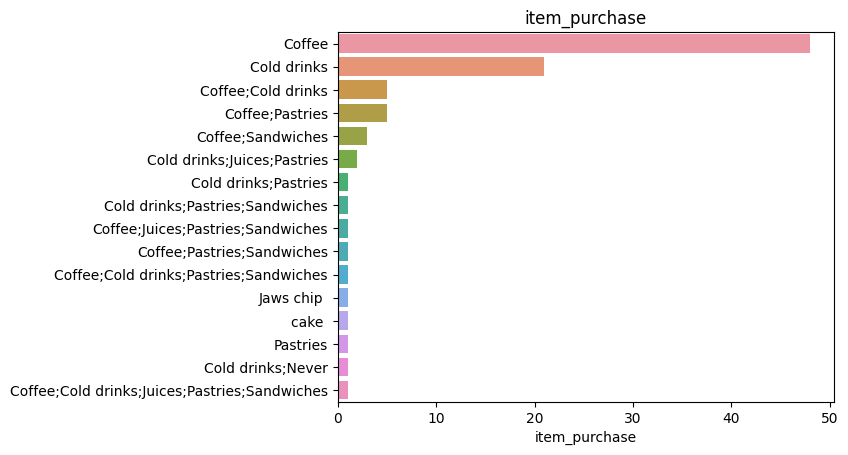

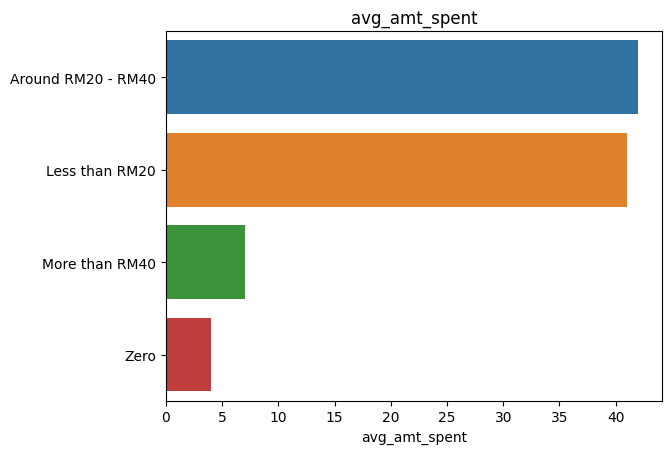

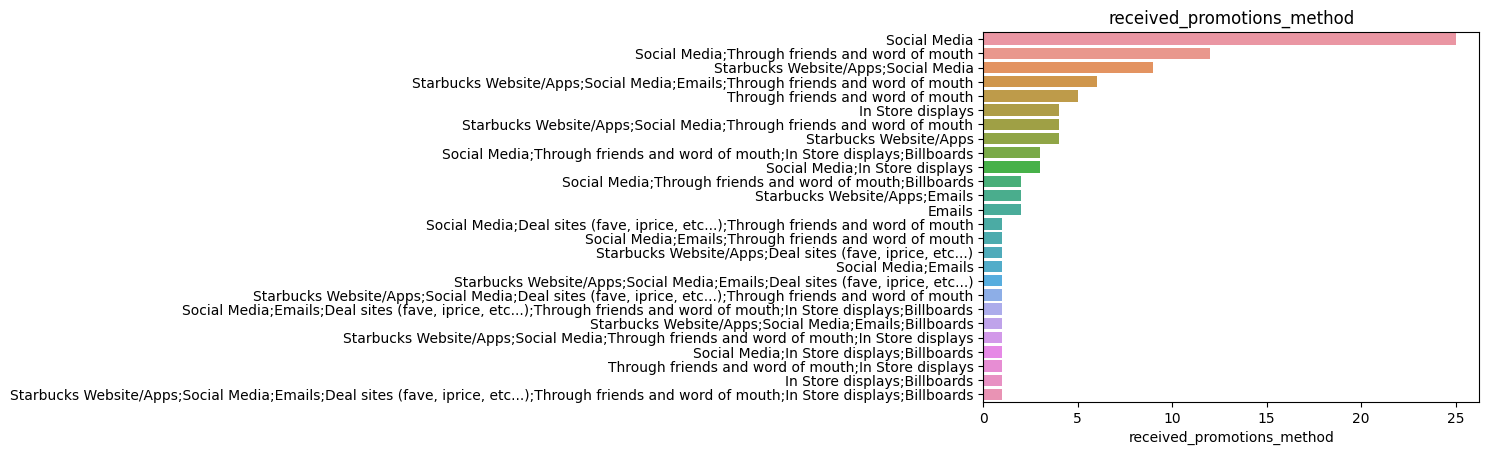

In [ ]:
#Barplots for Returning Customers Buying Behavior Analysis
for i in df_behavior.columns:
    sns.barplot(x=df_behavior[i].value_counts(), y=df_behavior[i].value_counts().index).set_title(i)
    plt.show()

In [ ]:
#Customer's ratings from 1 to 5
df_ratings = df[['product_quality_rate', 'price_range_rate', 'promotions_importance_rate', 'ambiance_rate', 'wifi_quality_rate', 'service_rate', 'meeting_hangout_place_rate']]
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 121
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   product_quality_rate        121 non-null    int64
 1   price_range_rate            121 non-null    int64
 2   promotions_importance_rate  121 non-null    int64
 3   ambiance_rate               121 non-null    int64
 4   wifi_quality_rate           121 non-null    int64
 5   service_rate                121 non-null    int64
 6   meeting_hangout_place_rate  121 non-null    int64
dtypes: int64(7)
memory usage: 7.6 KB


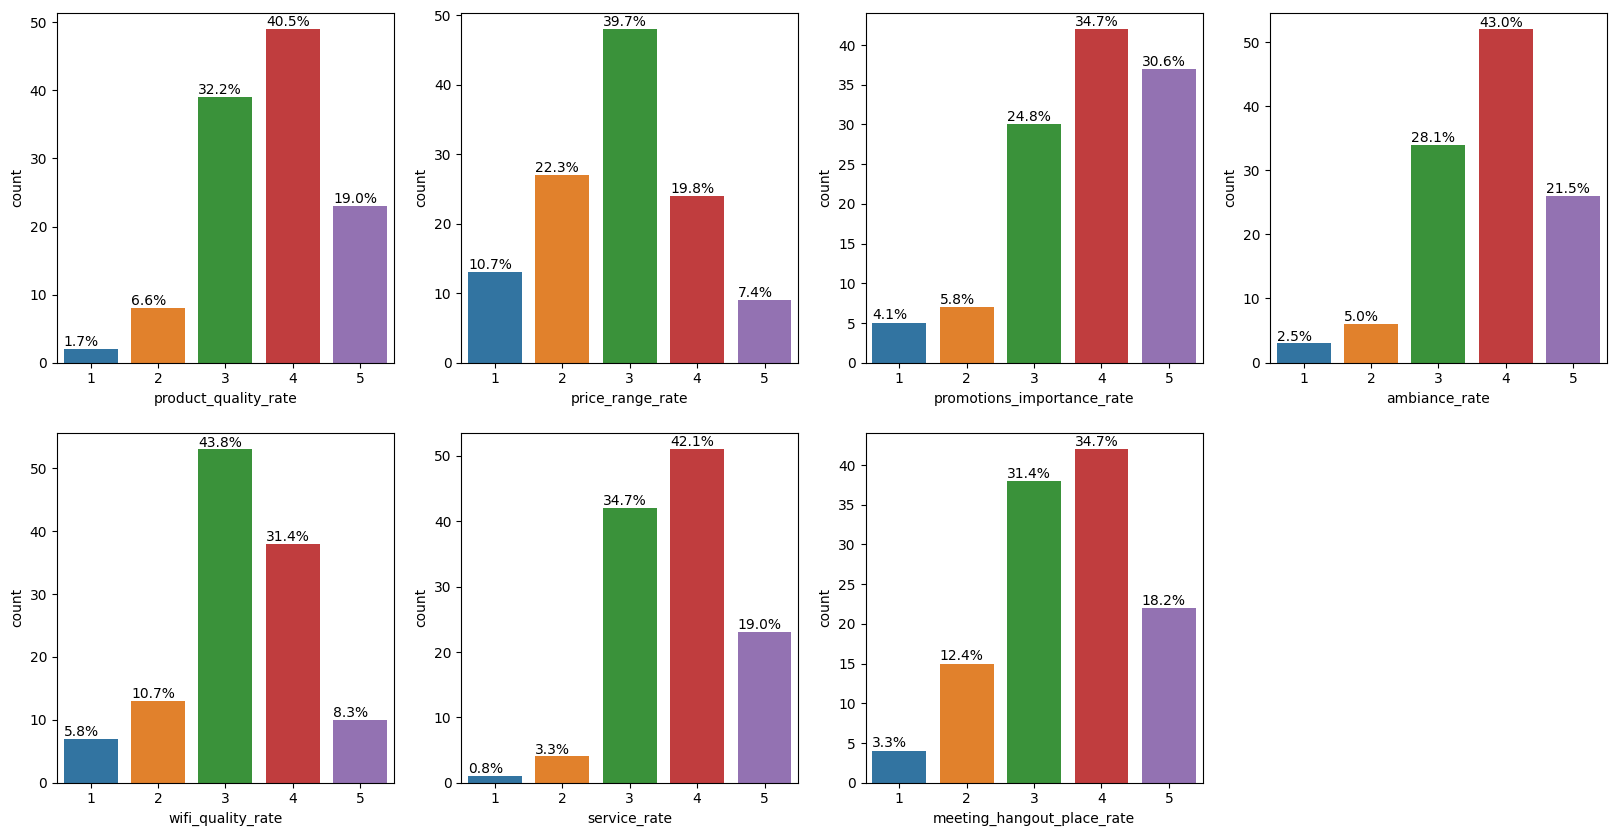

In [ ]:
plt.figure (figsize= (20,10))
plt.subplot(2,4,1)
ax1 = sns.countplot(x='product_quality_rate', data=df_ratings)
total = len(df_ratings['product_quality_rate'])
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.4
        y = p.get_y() + p.get_height() + 0.45
        ax1.annotate(percentage, (x, y))
plt.subplot(2,4,2)
ax2 = sns.countplot(x='price_range_rate', data=df_ratings)
total = len(df_ratings['price_range_rate'])
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.4
        y = p.get_y() + p.get_height() + 0.45
        ax2.annotate(percentage, (x, y))
plt.subplot(2,4,3)
ax3 = sns.countplot(x='promotions_importance_rate', data=df_ratings)
total = len(df_ratings['promotions_importance_rate'])
for p in ax3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.4
        y = p.get_y() + p.get_height() + 0.45
        ax3.annotate(percentage, (x, y))
plt.subplot(2,4,4)
ax4 = sns.countplot(x='ambiance_rate', data=df_ratings)
total = len(df_ratings['ambiance_rate'])
for p in ax4.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.4
        y = p.get_y() + p.get_height() + 0.45
        ax4.annotate(percentage, (x, y))
plt.subplot(2,4,5)
ax5 = sns.countplot(x='wifi_quality_rate', data=df_ratings)
total = len(df_ratings['wifi_quality_rate'])
for p in ax5.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.4
        y = p.get_y() + p.get_height() + 0.45
        ax5.annotate(percentage, (x, y))
plt.subplot(2,4,6)
ax6 = sns.countplot(x='service_rate', data=df_ratings)
total = len(df_ratings['service_rate'])
for p in ax6.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.4
        y = p.get_y() + p.get_height() + 0.45
        ax6.annotate(percentage, (x, y))
plt.subplot(2,4,7)
ax7 = sns.countplot(x='meeting_hangout_place_rate', data=df_ratings)
total = len(df_ratings['meeting_hangout_place_rate'])
for p in ax7.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.4
        y = p.get_y() + p.get_height() + 0.45
        ax7.annotate(percentage, (x, y))
plt.show()

In [ ]:
# Customer's ratings from 1 to 5 on product quality, price, promotions importance, ambiance, service and meeting/hangout place analysis as follows:

# 59.5% of the customers rated 4 to 5 for product quality. This shows that more than half of the customers are happy with Starbucks food and/or beverages.
# 33% of the customers rated 1 to 2 for the price range. Most customers rated 3. Pricing of the products can be improved to get more customers.
# Nearly 2/3 of the customers rated 4 to 5 for the importance of sales and promotions in their purchase decision.
# 64.5% of the customers rated 4 to 5 for the ambiance at Starbucks. This shows that nearly 2/3 of the customers are satisfied with the ambiance at Starbucks.
# Rating 3 is the most voted rate for WiFi quality at Starbucks.
# 61.1% of the customers rated 4 to 5 for the service at Starbucks.
# More than half of the customers(52.9%) rated 4 to 5 will likely choose Starbucks for doing business meetings or hangout with friends.
# Recommendations to increase sales:

# Sales and promotions targeted on most frequently purchased items such as coffee and cold drinks, customers in the age range of 20 to 29, employed people and students.
# Promote promotions on Social Media and Starbucks Website/Apps which are the more popular ways that Starbucks customers hear of promotions.
# Have more competitive product pricing as more than half of the returning customers earn an annual income of less than RM25,000.
# Increase sales and promotions to attract more customers.
# Further improve on the service to increase customers' satisfaction on the services provided.